# Exploratory Data Analysis on White Wine Dataset

## Steps

- **Load the dataset**
- **Check for data quality isssues**
- **Transform data(if needed)**
- **Analyze and visualize the data**

***Preparation: Load the libraries required for the whole process***

In [46]:
# Importing the libraries required for EDA
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipulation tool

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [47]:
# Load the dataset into pandas DataFrame object
white_wine = pd.read_csv('winequality-white.csv', sep=';')

### Check for data quality issues

Get a first look at the data

In [48]:
# Let's see the first 15 records of our data
white_wine.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


They are all numerical values. Great!

In [49]:
# How many records do we have in our dataset
white_wine.shape

(4898, 12)

- We have **4898** records (rows) and **12** features(columns)
- **11** input variables and **1** target variable (quality)

In [50]:
# Check if the dtypes are numerical since we have only numerical values in the data
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

They are all numerical data type. Perfect!

In [51]:
# Check for null values in our data
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [52]:
# Also check with the basic summary of the dataset
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


It is seen from the basic summary and null check above that we don't have any null values in our data as well as missing entries. All entries are filled!

### Data Transformation

In [53]:
# Let's see the data once more.
white_wine.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


The only thing I see that needed transformation here are the feature names.

In [54]:
# View the features (columns)
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [55]:
# Remove the whitespace in between the feature names
white_wine.rename(columns={'fixed acidity':'fixed_acidity',
                           'volatile acidity':'volatile_acidity',
                           'citric acid':'citric_acid',
                           'residual sugar':'residual_sugar',
                           'free sulfur dioxide':'free_sulfur_dioxide',
                           'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [56]:
# Check the changes
white_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [57]:
# Also using head()
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Now each feature can be accessed as via "white_wine'.feature-name'"

### Analyze and Visualize the Data

The target variable of the dataset is the quality. Let's extract it into another DataFrame object then carry apply differential statistics

In [58]:
# Get the quality feature into another DataFrame object
target_white_wine = white_wine.quality

In [59]:
# View the new DataFrame object
target_white_wine.head(10)

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: quality, dtype: int64

Perfect! Now let's explore this feature

In [60]:
# How many data do we have here? We should have 4898
target_white_wine.shape

(4898,)

That number matched the number of records in our dataset. Perfect!

In [61]:
# How many unique values are in this series?
target_white_wine.sort_values().unique()

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

*These values show us that the quality of white wine in our dataset ranges from 3 to 9 i.e. from fairly bad to very good.*

**So how many of the white wines are bad, average and good?**

Given that:
- 1-3 => Bad
- 4-7 => Average
- 8-10 => Good

In [62]:
# How many of these do we have in our dataset?
target_white_wine.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

C:\Users\Maverick\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


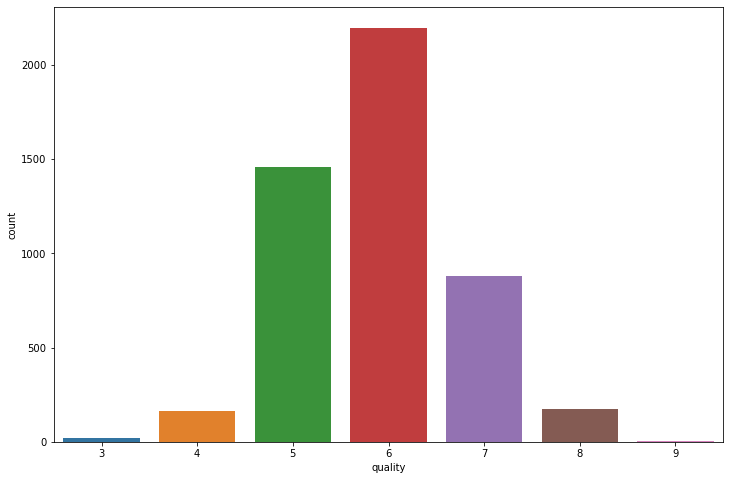

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(target_white_wine)
plt.show()

We can clearly see from the plot above that the quality of white wine based on 11 input variables has most values concentrated around ***5, 6 & 7*** with 6 being the highest.
- *Meaning there are more average(4-7) quality of wines than bad(1-3) and good (8-10) quality of wines based on those 11 inputs.*

*Let's carry out a little bit of statistics on our target variable.*

In [64]:
# Get a statistical overview
target_white_wine.describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

- Mean quality - 5.88
- Median quality - 6.00

*Mean is lesser than median => our series is negatively skewed*
- But the difference isn't that massive so let's take a look at histogram chart to see if the skewness is that obvious

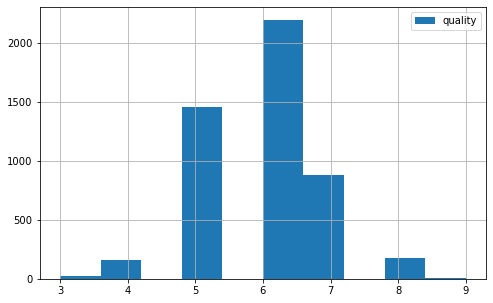

In [65]:
plt.figure(figsize=(8, 5))
target_white_wine.hist(legend=True)
plt.show()

Our data ranges from **3 to 9** with our median value at **6** which is also the mode of the series. So **6** being bigger than our mean value of **5.88 by 0.12** and standard deviation of approximately **0.9**, implies the skewness is neglible

**Now let's turn to our input variables and figure out statistically which ones contribute largely to the quality of white wine**

In [66]:
# Strip the input from the data and put it in another DataFrame object
input_white_wine = white_wine.drop('quality', axis=1)

# Then present a statistical overview
input_white_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


**Observations**
- We can see from the overview that our data tightly concentrated around their mean values.
- The mean values are greater than their respective median values; positive skew i.e. the outliers are to the right in an ordered series
- The mean values for each feature falls between the 25th percentile and 75th percentile.
- The max values for each feature is way bigger than the addition of our mean value and their respective standard deviations.
- There's a massive difference between max values and the 75th percentile relative to the standard deviation of each feature; this denotes the presence of outliers

So if we order our data and section it into 4, we can neglect the last quarter as the above observations suggests they are outliers.
- *Disregarding everything after 75th percentile shouldn't affect our inferences.*

Let's view the histogram charts of the features to confirm our observations.

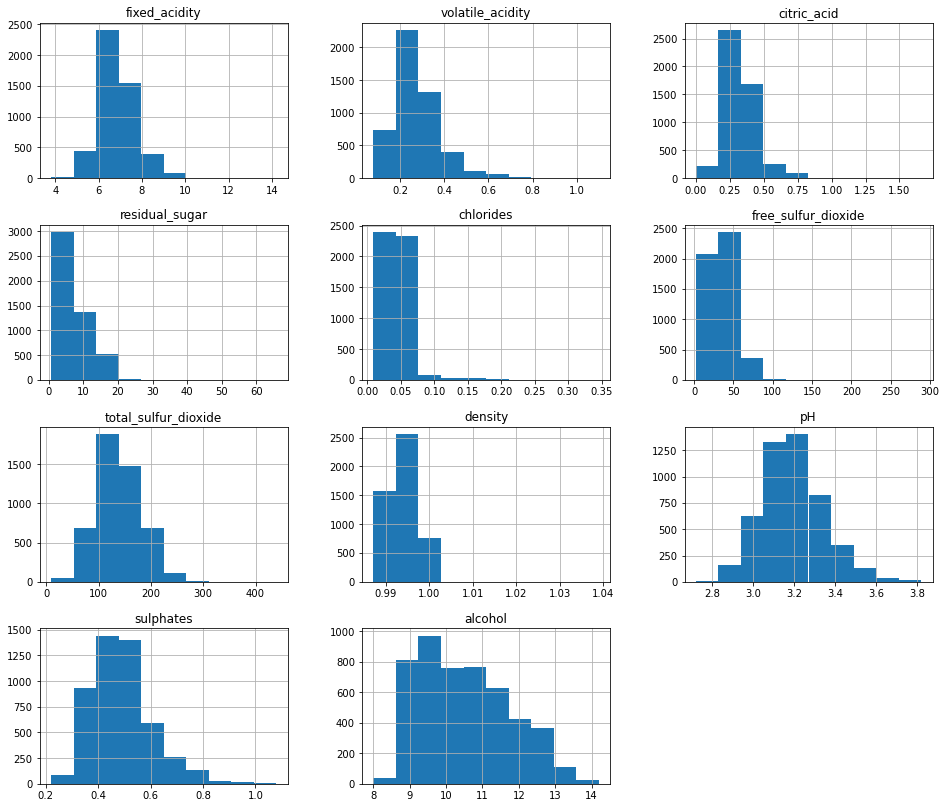

In [67]:
# Plot a histogram chart of the features
input_white_wine.hist(bins=10, figsize=(16, 14))
plt.show()

We can clearly see from the histograms that relatively all our input variables are right skewed which means we have outliers to the right.
- Therefore we can remove the data points after 75th percentile in our model.

### Question: How can we improve the quality of white wine?

We'll use correlation analysis to answer the question above.

In [68]:
# Display correlation between the features
white_wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


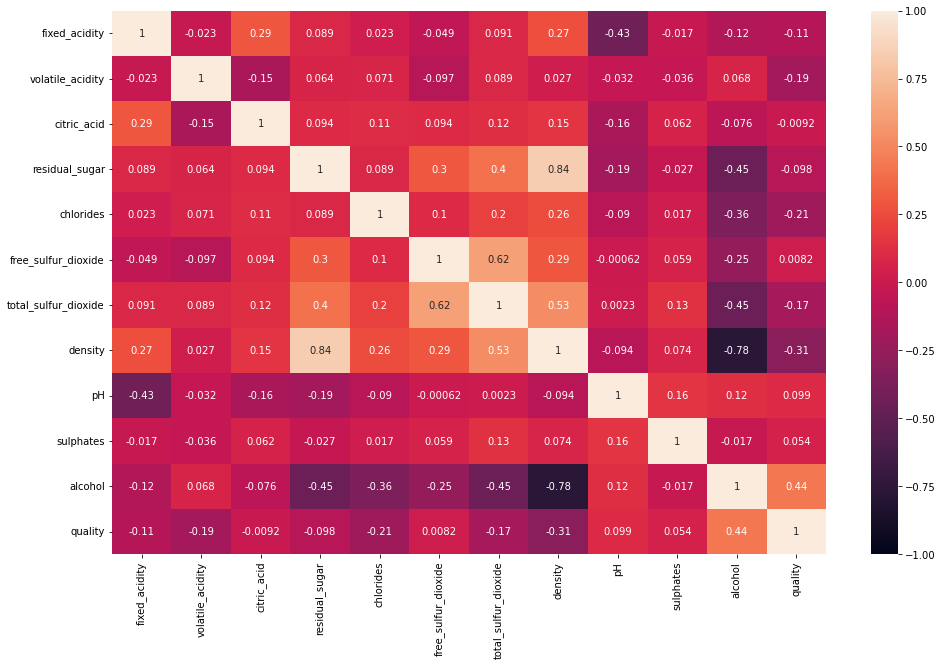

In [69]:
# Let's view this with a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(white_wine.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

**Observations**
- Alcohol has the highest postive correlation with white wine quality. So increasing alcohol levels should result in better white wine.
- Density, chlorides, sulphur dioxide and the acids are negatively correlated with white wine quality so reducing all these should boost the quality.
- There is relatively high negative correlation between alcohol & density, alcohol & chlorides and alcohol & sulphur dioxides. This further reinforces the observation above.
- Reducing residual sugar should increase the effectiveness of alcohol as they are negatively correlated. Hence increasing the quality of white wine.

*Let's have a look at the box plots of each of these input features against target feature.*

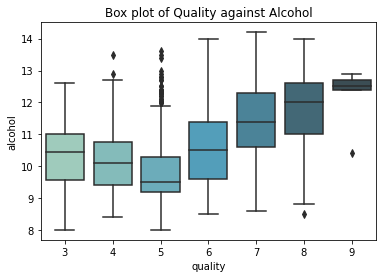

In [70]:
sns.boxplot(x=target_white_wine, y=white_wine.alcohol, palette='GnBu_d')
plt.title('Box plot of Quality against Alcohol')
plt.show()

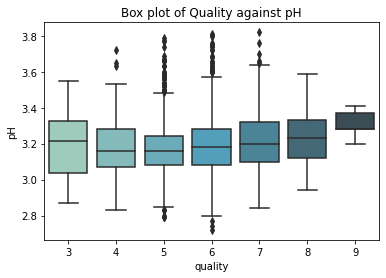

In [71]:
sns.boxplot(x=target_white_wine, y=white_wine.pH, palette='GnBu_d')
plt.title('Box plot of Quality against pH')
plt.show()

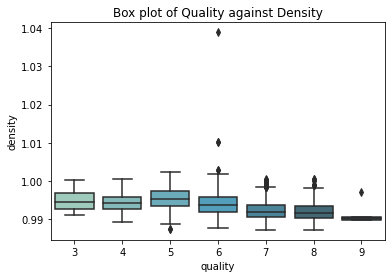

In [72]:
sns.boxplot(x=target_white_wine, y=white_wine.density, palette='GnBu_d')
plt.title('Box plot of Quality against Density')
plt.show()

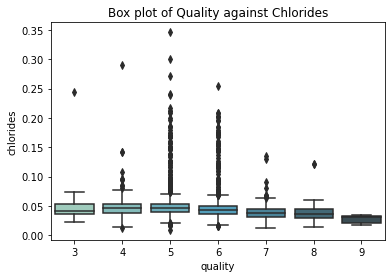

In [73]:
sns.boxplot(x=target_white_wine, y=white_wine.chlorides, palette='GnBu_d')
plt.title('Box plot of Quality against Chlorides')
plt.show()

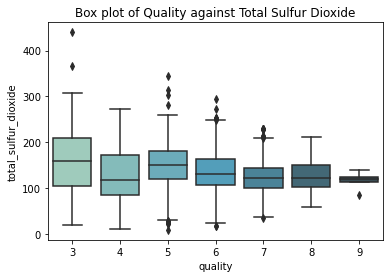

In [74]:
sns.boxplot(x=target_white_wine, y=white_wine.total_sulfur_dioxide, palette='GnBu_d')
plt.title('Box plot of Quality against Total Sulfur Dioxide')
plt.show()

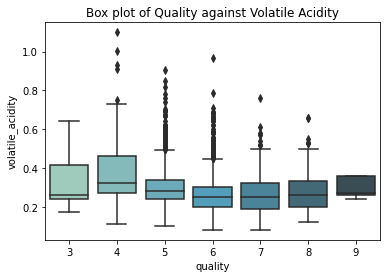

In [75]:
sns.boxplot(x=target_white_wine, y=white_wine.volatile_acidity, palette='GnBu_d')
plt.title('Box plot of Quality against Volatile Acidity')
plt.show()

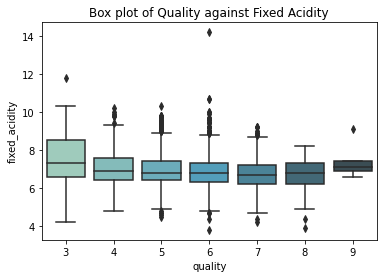

In [76]:
sns.boxplot(x=target_white_wine, y=white_wine.fixed_acidity, palette='GnBu_d')
plt.title('Box plot of Quality against Fixed Acidity')
plt.show()

We can see from these box plots that only alcohol increased the quality of white wine.

**To improve the quality of white wine, we need to:**
- Increase alcohol levels
- Decrease density, chlorides and sulphur dioxides and acids
- Decrease residual sugar to strengthen the effectiveness of alcohol